In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-08_03'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-08_03
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-08_03\corrected


In [3]:
file_s1 ='FGDOS_03F_HIGH_C6_3_Mar_08_20-45-11_s1.csv'
file_s2 ='FGDOS_03F_HIGH_C6_3_Mar_08_20-45-11_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-08_03\Arduino_CSV\corrected'+ '\\'+ file_s1 ,engine='python')
df_s2 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-08_03\Arduino_CSV\corrected'+ '\\'+ file_s2 ,engine='python')


FGDOS_03F_HIGH_C6_3_Mar_08_20-45-11_s1.csv
FGDOS_03F_HIGH_C6_3_Mar_08_20-45-11_s2.csv


In [4]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
#df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.0000,1,80,55274,76583,0,7.63,h,0,0
1,243.0179,1,80,55122,76599,0,7.63,h,0,0
2,509.0368,1,80,55030,76591,0,7.63,h,0,0
3,772.0557,1,80,54855,76599,0,7.63,h,0,0
4,1034.0746,1,80,54687,76614,0,7.63,h,0,0


In [5]:
energy = 200
dose_rate_air = 0.85  # Gy/min
conv_factor = 0.912   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

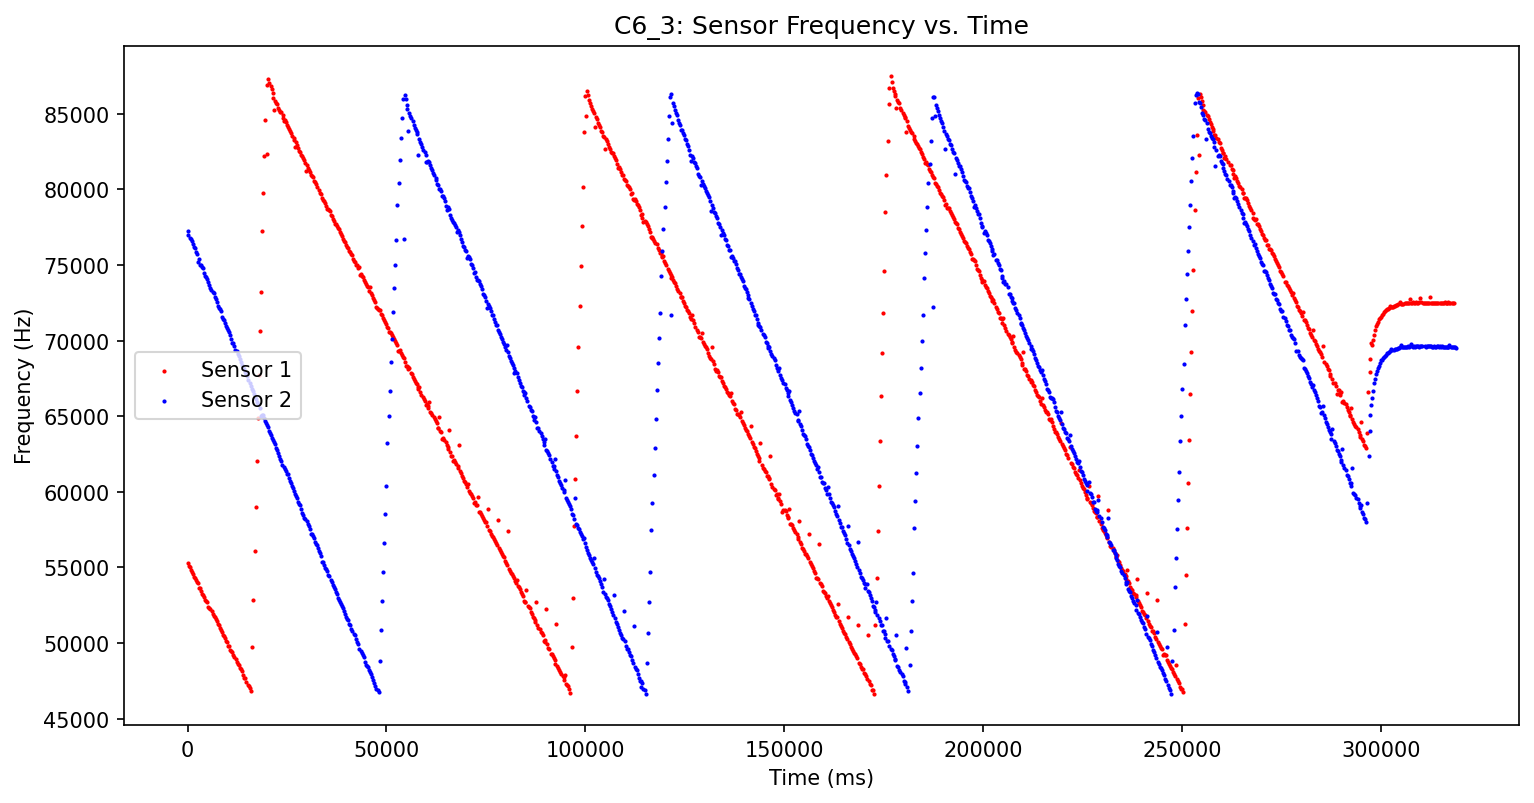

In [14]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.6e5,1.1e5)
#plt.xlim(ll_1,ul_1)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("C6_3: Sensor Frequency vs. Time")
plt.show()

In [15]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 3e4
ul_1 = 0.9e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]
#zone_1[:,0]

ll_2 = 1.1e5
ul_2 = 1.7e5
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [16]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.008814454949095274
intercept: [65525.76396668]
slope: [[0.01155615]]
Sensor 1 sensitivity in kHz/Gy:  [[0.89443904]]


In [17]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9990418950840099
intercept: [97144.86384665]
slope: [[-0.52137075]]
Sensor 1 sensitivity in kHz/Gy:  [[40.35377346]]


In [18]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9987266002498407
intercept: [139883.24870317]
slope: [[-0.53946801]]
Sensor 1 sensitivity in kHz/Gy:  [[41.75449021]]


In [19]:
# Sensor 2 irradiation intervals
ll_1 = 0.1e4
ul_1 = 0.4e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 0.65e5
ul_2 = 1.1e5
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [20]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.003493916867050806
intercept: [65640.29285096]
slope: [[0.00680105]]
Sensor 2 sensitivity in kHz/Gy:  [[0.526397]]


In [21]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.999884883639835
intercept: [77163.99803756]
slope: [[-0.63882753]]
Sensor 2 sensitivity in kHz/Gy:  [[49.44485488]]


In [22]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9991188188525086
intercept: [121014.62318122]
slope: [[-0.64428008]]
Sensor 2 sensitivity in kHz/Gy:  [[49.86687928]]


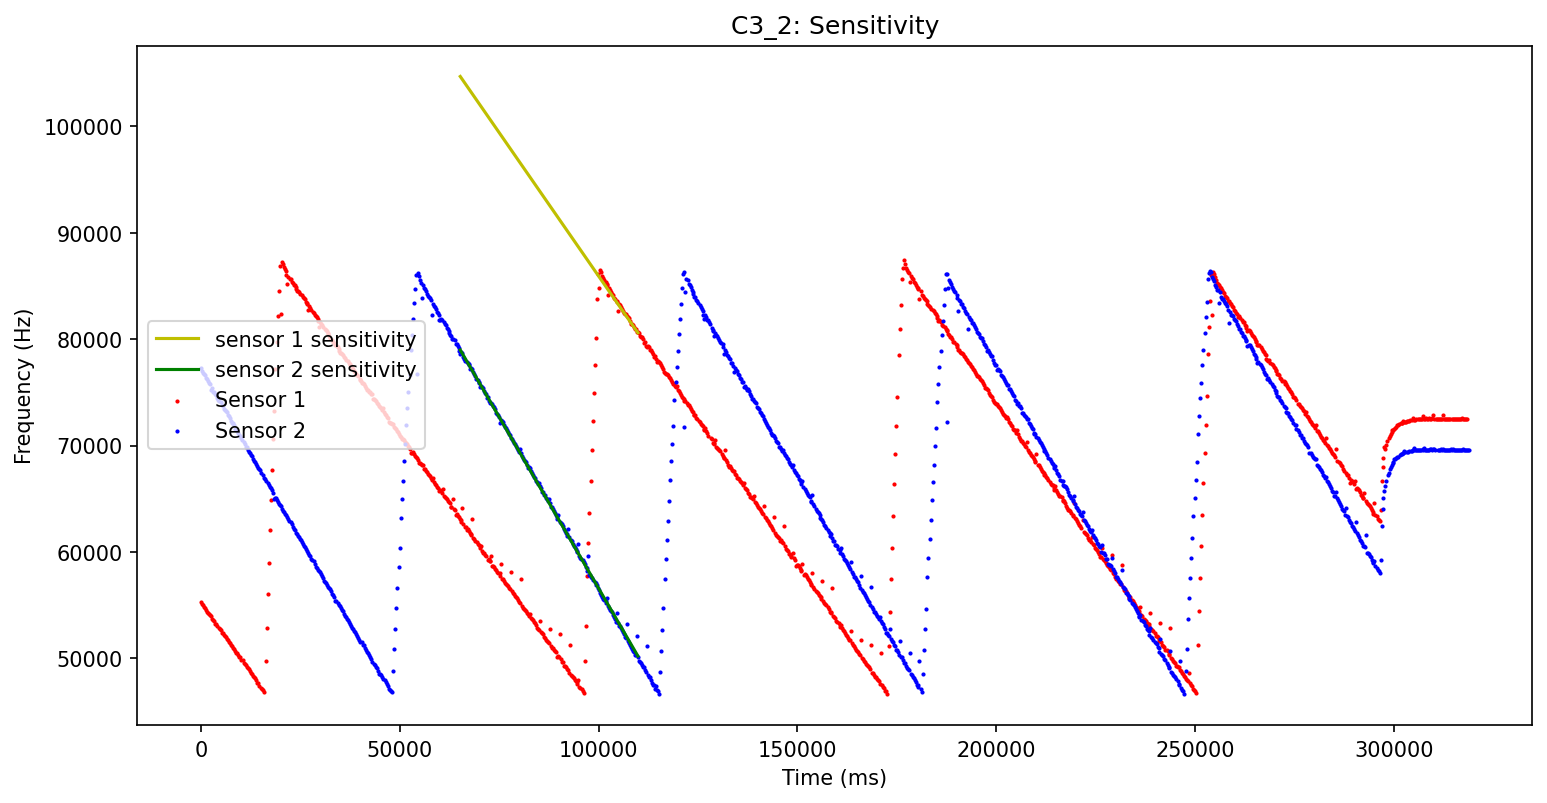

In [23]:
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C3_2: Sensitivity")
plt.show()

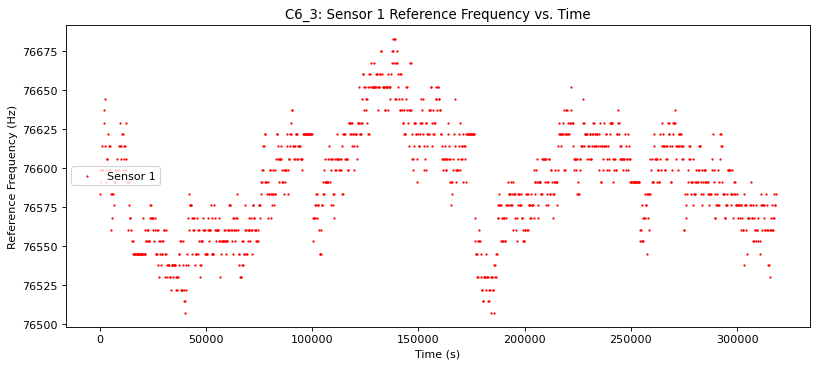

In [24]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C6_3: Sensor 1 Reference Frequency vs. Time")
plt.show()

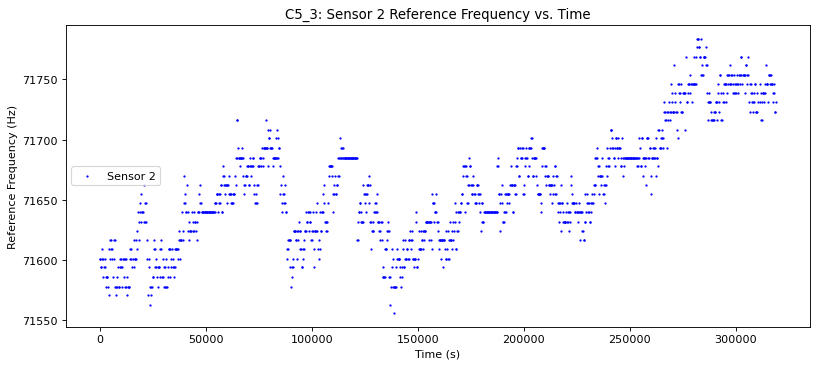

In [25]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C5_3: Sensor 2 Reference Frequency vs. Time")
plt.show()

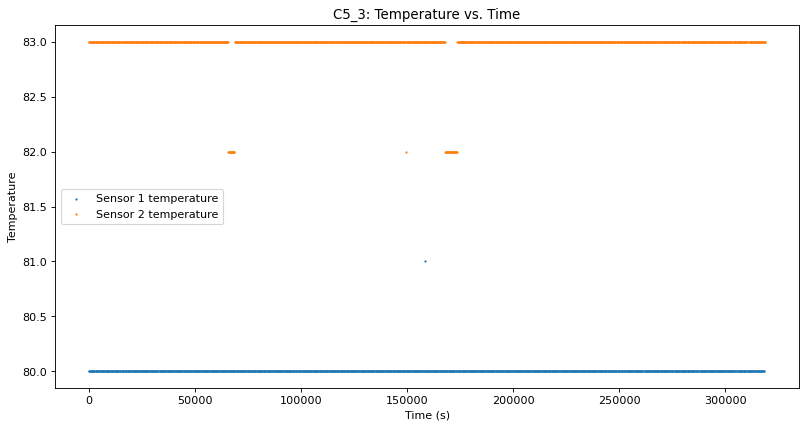

In [26]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("C5_3: Temperature vs. Time")
plt.show()

In [27]:
s1[1:,0].shape
        

(1254,)

In [28]:
#s1[(s1[:,0]> 3e5)]